In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

In [180]:
df = pd.read_excel('netflix_titles.xlsx')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [181]:
df.drop(columns=['show_id'], inplace=True)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8809 non-null   object
 1   title         8809 non-null   object
 2   director      6175 non-null   object
 3   cast          7984 non-null   object
 4   country       7978 non-null   object
 5   date_added    8799 non-null   object
 6   release_year  8809 non-null   int64 
 7   rating        8805 non-null   object
 8   duration      8806 non-null   object
 9   listed_in     8809 non-null   object
 10  description   8809 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.2+ KB


In [183]:
df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [184]:

df.fillna({'director':'Unknown'}, inplace=True)

df.fillna({'cast':'Unknown'}, inplace=True)

df.fillna({'country':'Unknown'}, inplace=True)

df.fillna({'date_added':'2000-01-01'}, inplace=True)

df.fillna({'rating':'Not Rated'}, inplace=True)

df.fillna({'duration':'No Duration specified'}, inplace=True)

df['date_added'] = pd.to_datetime(df['date_added'])

In [185]:
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [186]:
df.duplicated().sum()

3

In [187]:
df.drop_duplicates(inplace=True)

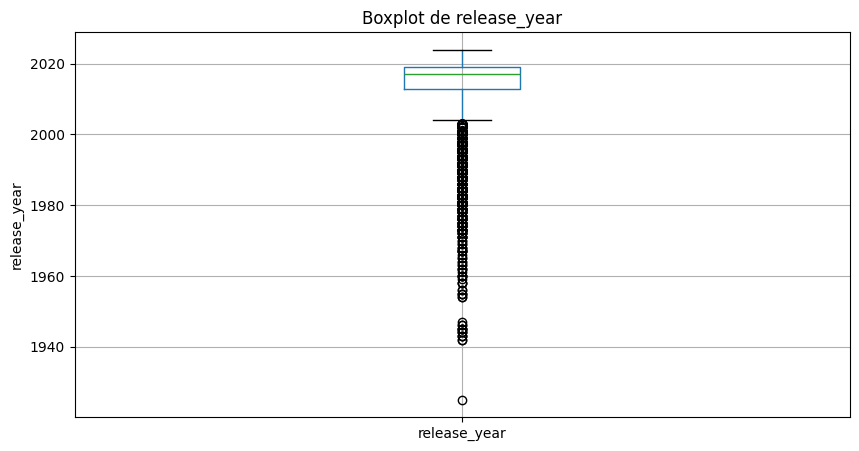

In [188]:
def graficos_boxplot(df):
	  
	  # Selecciona solo las columnas numéricas
    df_numerico = df.select_dtypes('number')
    
    # Itera sobre cada columna numérica
    for columna in df_numerico.columns:
        plt.figure(figsize=(10, 5))
        df.boxplot(column=columna)
        plt.title(f'Boxplot de {columna}')
        plt.ylabel(columna)
        plt.show()
        

graficos_boxplot(df)

In [189]:
df.country.value_counts()

country
United States                             2819
India                                      971
Unknown                                    830
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

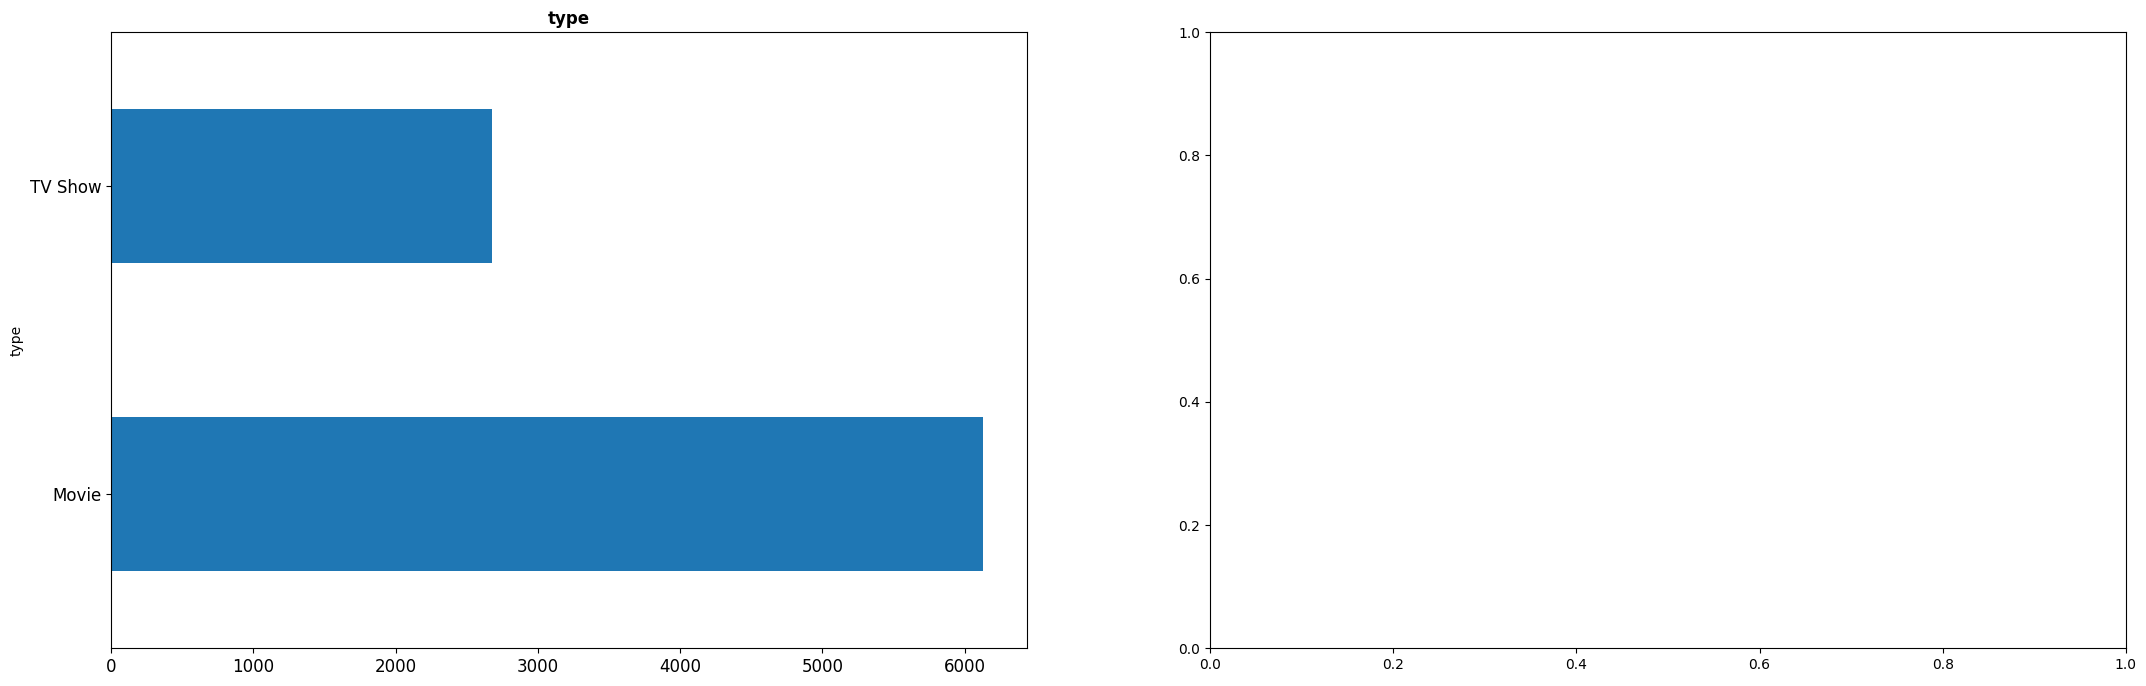

In [190]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (26, filas * 8))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)
        
graficos_eda_categoricos(df.select_dtypes('O').loc[:,['type']])

In [191]:
text_columns = df.select_dtypes('object').columns
text_columns

Index(['type', 'title', 'director', 'cast', 'country', 'rating', 'duration',
       'listed_in', 'description'],
      dtype='object')

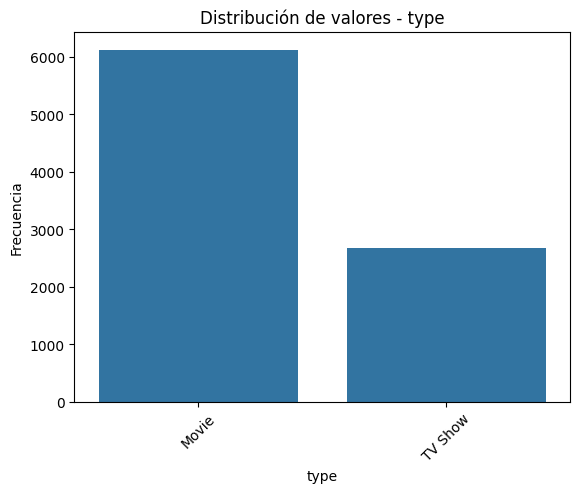

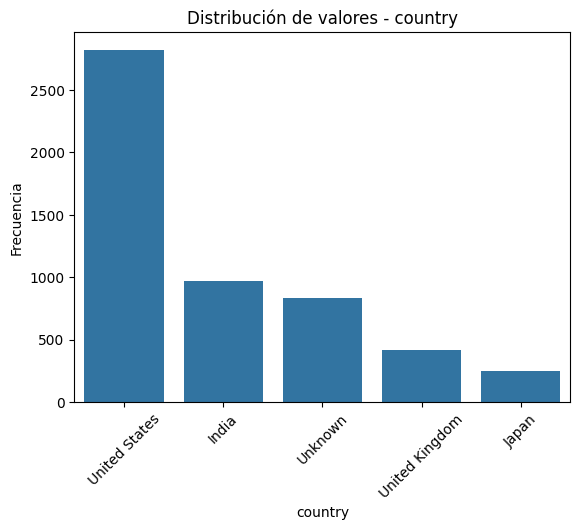

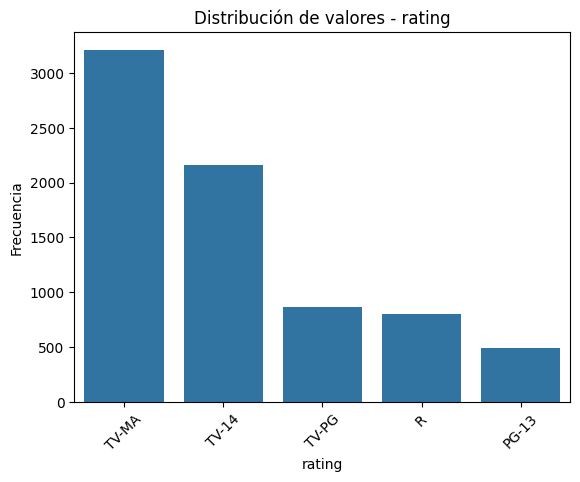

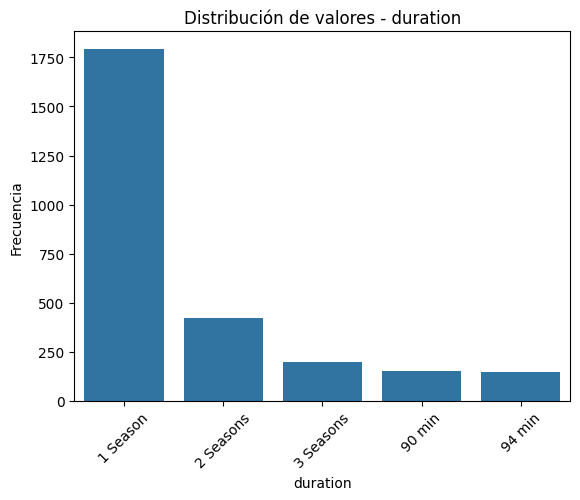

In [223]:
for column in text_columns:
  if(column in ['type' , 'country', 'rating', 'duration' ]):
    a = df[column].value_counts().head()
    sns.barplot(x=a.index, y=a.values)
    plt.title(f"Distribución de valores - {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation= 45)
    plt.show()
    

## Distribución del tipo de contenido en Netflix

type
Movie      6130
TV Show    2676
Name: count, dtype: int64


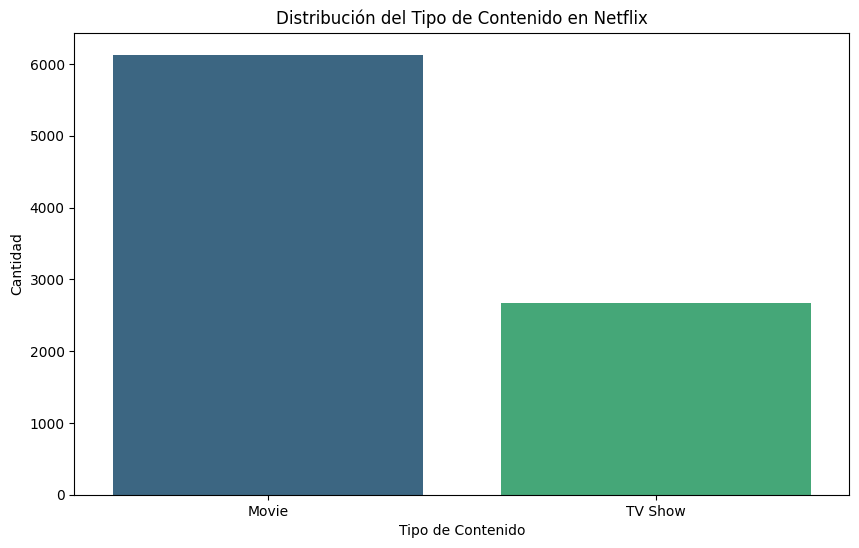

In [193]:
type_counts = df['type'].value_counts()
print(type_counts)

movies = df[df.type == 'Movie']
tv_shows = df[df.type == 'TV Show']

plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, palette='viridis', hue='type', dodge=False, legend=False)
plt.title('Distribución del Tipo de Contenido en Netflix')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Cantidad')
plt.show()


## País de origen del contenido

In [194]:
df.country.value_counts()

country
United States                             2819
India                                      971
Unknown                                    830
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

country
United States     2751
India              961
United Kingdom     532
Unknown            440
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Egypt              102
Hong Kong          100
Nigeria             94
Australia           94
Indonesia           86
Turkey              83
Philippines         80
Belgium             78
Italy               75
Name: count, dtype: int64
country
United States     938
Unknown           390
United Kingdom    272
Japan             199
South Korea       171
Canada            126
France             90
India              84
Taiwan             70
Australia          66
Spain              61
Mexico             58
China              48
Germany            44
Colombia           32
Brazil             31
Turkey             30
Italy              25
Thailand           24
Singapore          23
Name: count, dtype: int64


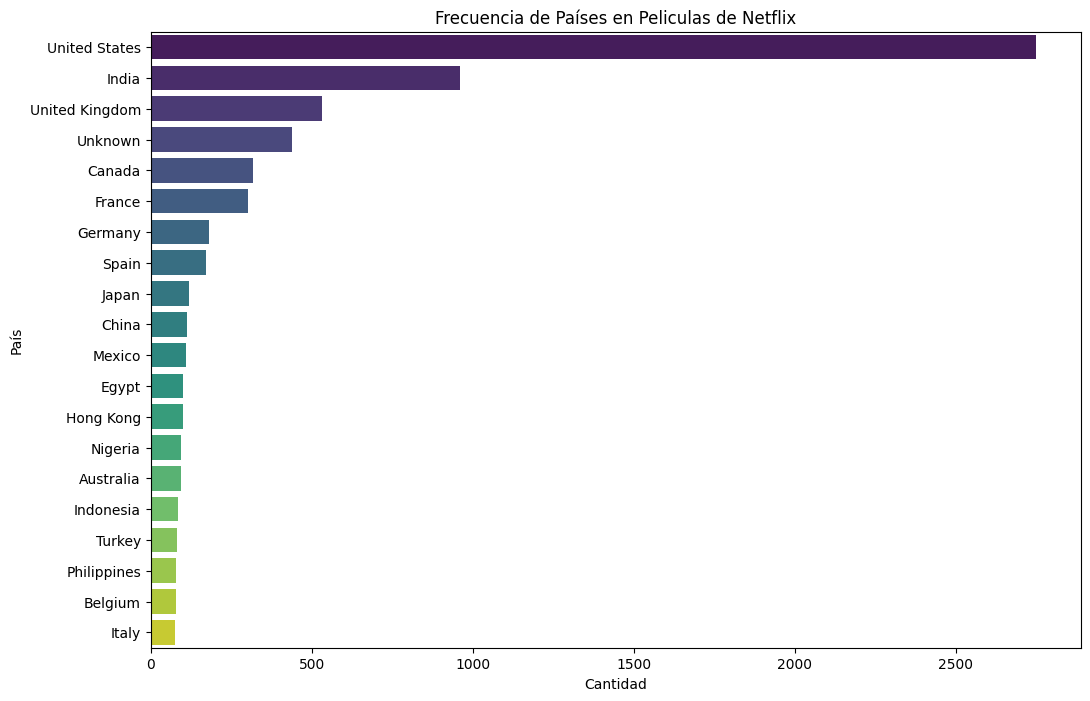

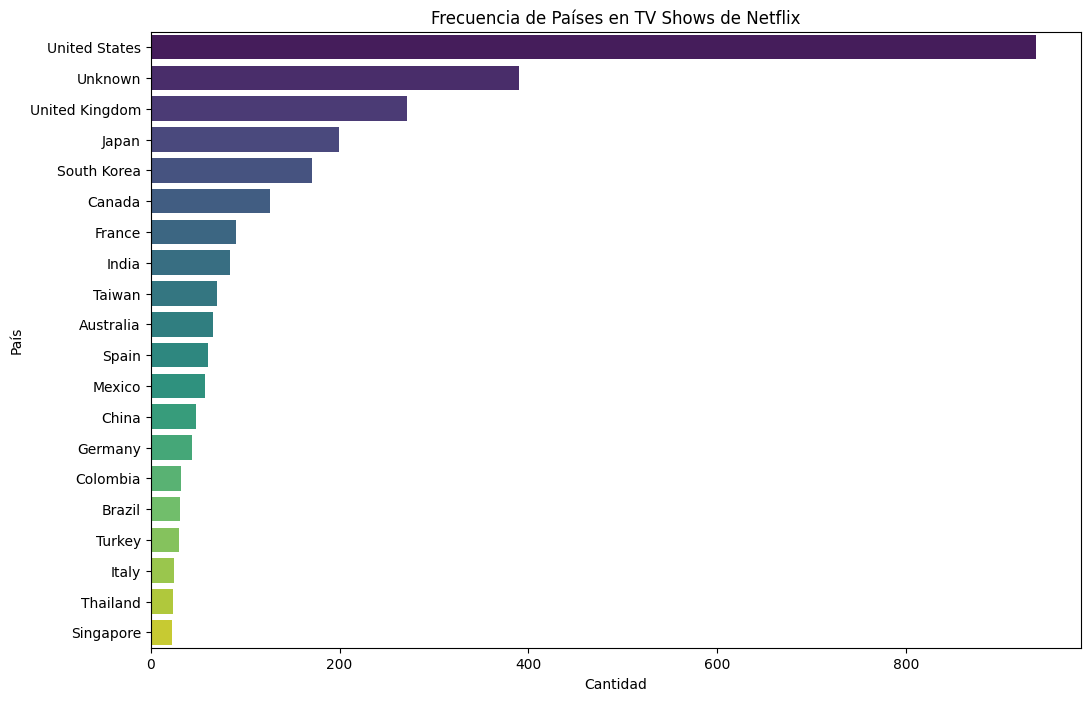

In [195]:
movies_countries = movies['country'].str.split(', ').explode().value_counts().sort_values(ascending=False)
tvshows_countries = tv_shows['country'].str.split(', ').explode().value_counts().sort_values(ascending=False)

print(movies_countries.sort_values(ascending=False).head(20))
print(tvshows_countries.sort_values(ascending=False).head(20))

plt.figure(figsize=(12, 8))
sns.barplot(y=movies_countries.index[:20], x=movies_countries.values[:20], hue=movies_countries.index[:20]  ,dodge=False, palette='viridis')
plt.title('Frecuencia de Países en Peliculas de Netflix')
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.legend([],[], frameon=False)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(y=tvshows_countries.index[:20], x=tvshows_countries.values[:20], hue=tvshows_countries.index[:20], dodge=False, palette='viridis')
plt.title('Frecuencia de Países en TV Shows de Netflix')
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.legend([],[], frameon=False)
plt.show()

## Rating del contenido de netflix

rating
TV-MA        2062
TV-14        1426
R             796
TV-PG         540
PG-13         490
PG            287
TV-Y7         139
TV-Y          131
TV-G          126
NR             75
G              41
TV-Y7-FV        5
NC-17           3
UR              3
Not Rated       2
74 min          1
84 min          1
66 min          1
A               1
Name: count, dtype: int64
rating
TV-MA        1146
TV-14         732
TV-PG         323
TV-Y7         195
TV-Y          176
TV-G           94
NR              5
R               2
Not Rated       2
TV-Y7-FV        1
Name: count, dtype: int64


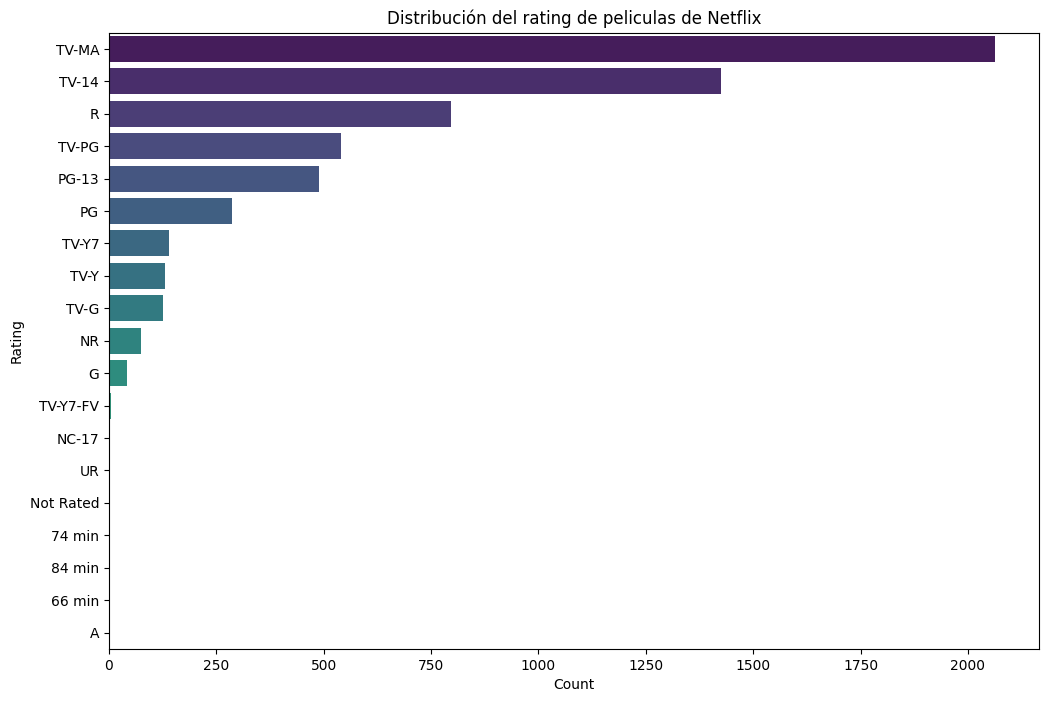

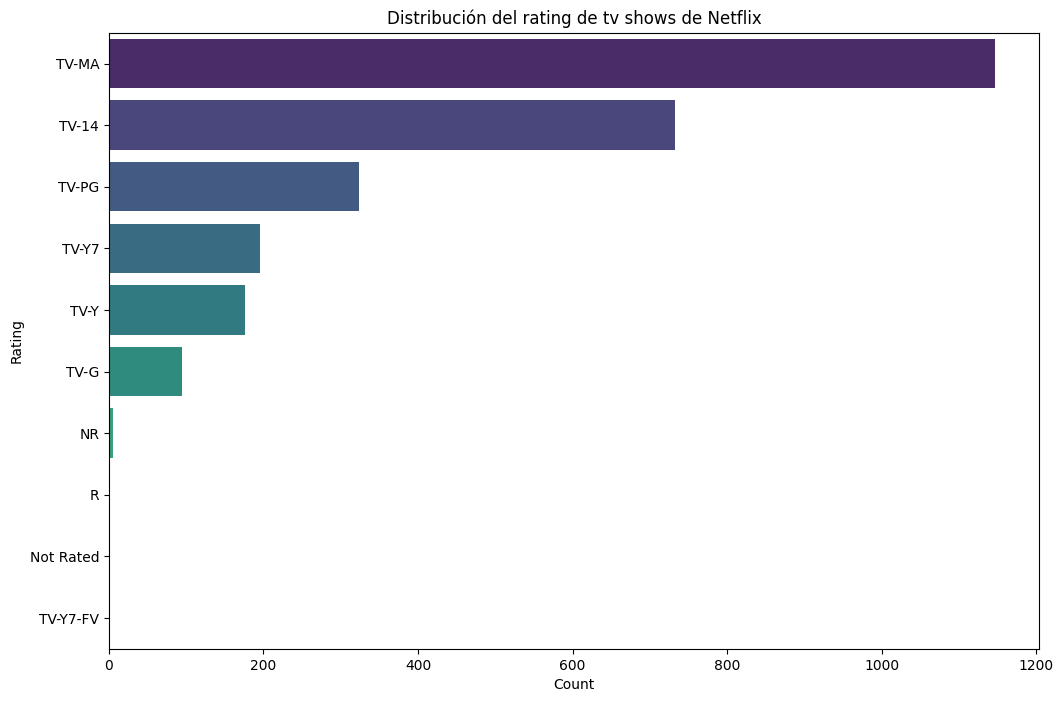

In [196]:
movies_rating_counts = movies['rating'].value_counts()
tvshows_rating_counts = tv_shows['rating'].value_counts()
print(movies_rating_counts)
print(tvshows_rating_counts)

plt.figure(figsize=(12, 8))
sns.barplot(y=movies_rating_counts.index, x=movies_rating_counts.values, hue=movies_rating_counts.index, dodge=False, palette='viridis')
plt.title('Distribución del rating de peliculas de Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.legend([],[], frameon=False)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(y=tvshows_rating_counts.index, x=tvshows_rating_counts.values, hue=tvshows_rating_counts.index, dodge=False, palette='viridis')
plt.title('Distribución del rating de tv shows de Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.legend([],[], frameon=False)
plt.show()

## Distribuación de la duración de peliculas y tv shows de Netflix

In [197]:
df.duration.value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
189 min         1
10 min          1
3 min           1
229 min         1
191 min         1
Name: count, Length: 221, dtype: int64

C:\Users\juana\AppData\Local\Temp\ipykernel_15904\1403497102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.loc[:,'duration_num'] = movies['duration'].apply(lambda x: int(x.split()[0]) if x.split()[0] != 'No' else 0)


duration
1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: count, dtype: int64


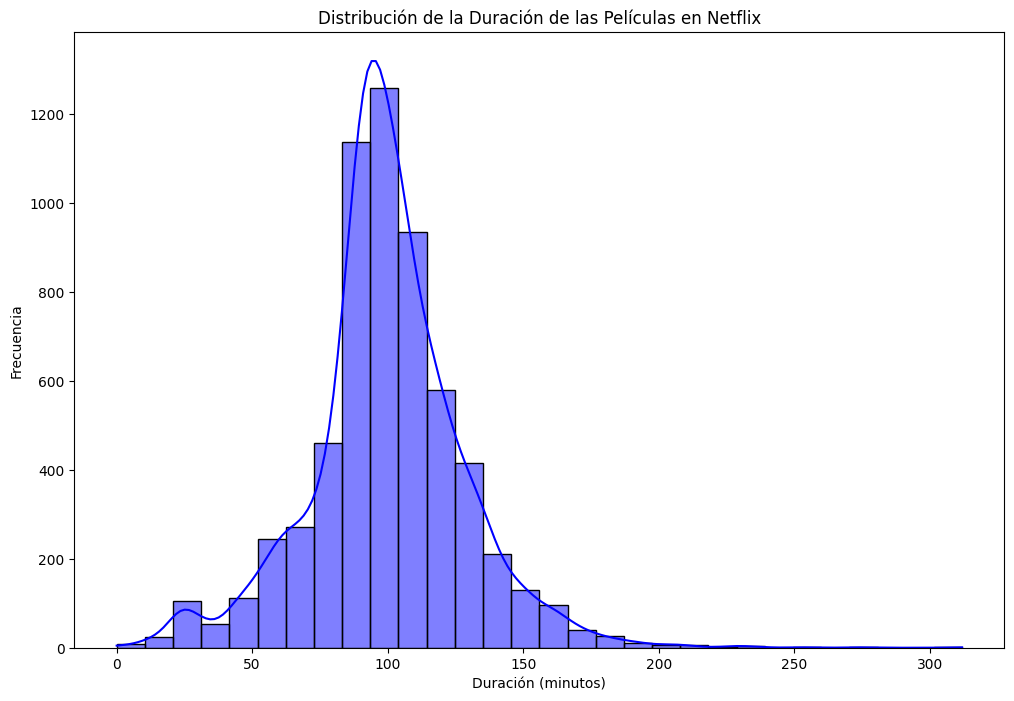

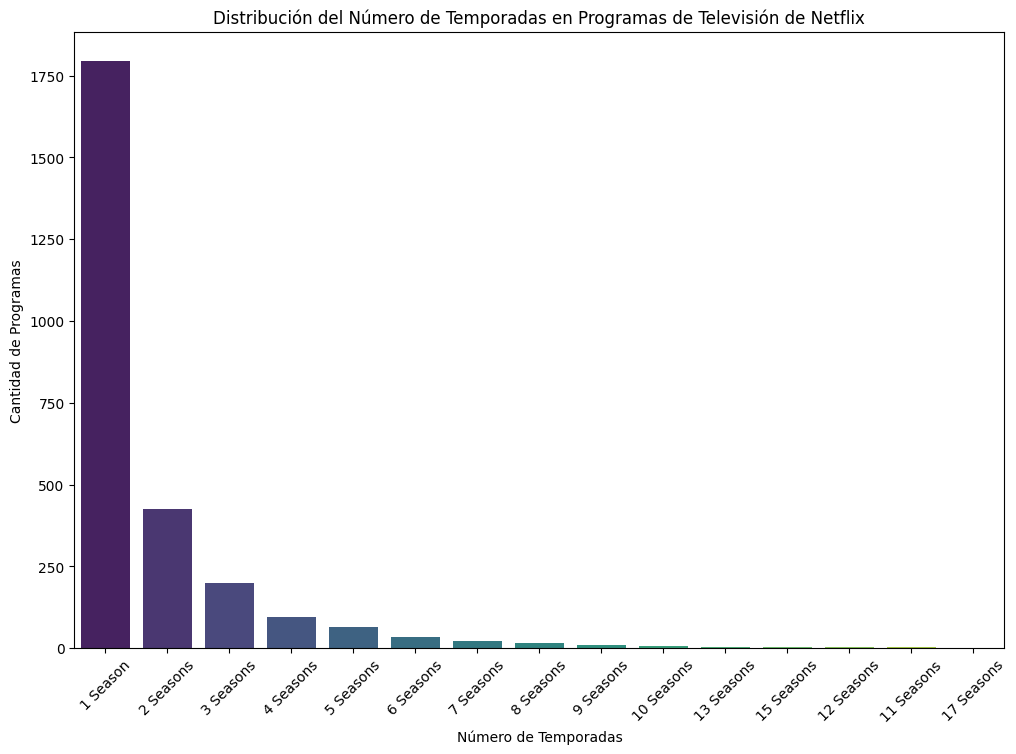

In [198]:

movies.loc[:,'duration_num'] = movies['duration'].apply(lambda x: int(x.split()[0]) if x.split()[0] != 'No' else 0)


movies_duration = movies['duration_num']
seasons_counts = tv_shows['duration'].value_counts().sort_values(ascending=False)

print(seasons_counts)

plt.figure(figsize=(12, 8))
sns.histplot(movies_duration, kde=True, color='blue', bins=30)
plt.title('Distribución de la Duración de las Películas en Netflix')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()


plt.figure(figsize=(12, 8))
sns.barplot(x=seasons_counts.index, y=seasons_counts.values, palette='viridis', hue=seasons_counts.index)
plt.title('Distribución del Número de Temporadas en Programas de Televisión de Netflix')
plt.xlabel('Número de Temporadas')
plt.xticks(rotation=45)  
plt.ylabel('Cantidad de Programas')
plt.show()



## Distribuación del año de lanzamiento de películas y tv shows en Netflix

release_year
1942      2
1943      3
1944      3
1945      3
1946      1
       ... 
2017    767
2018    766
2019    632
2020    517
2021    277
Name: count, Length: 73, dtype: int64
release_year
1925      1
1945      1
1946      1
1963      1
1967      1
1972      1
1974      1
1977      1
1979      1
1981      1
1985      1
1986      2
1988      2
1989      1
1990      3
1991      1
1992      3
1993      4
1994      2
1995      2
1996      3
1997      4
1998      4
1999      7
2000      4
2001      5
2002      7
2003     10
2004      9
2005     13
2006     14
2007     14
2008     23
2009     34
2010     40
2011     40
2012     64
2013     63
2014     88
2015    162
2016    244
2017    265
2018    379
2019    397
2020    436
2021    315
2024      1
Name: count, dtype: int64


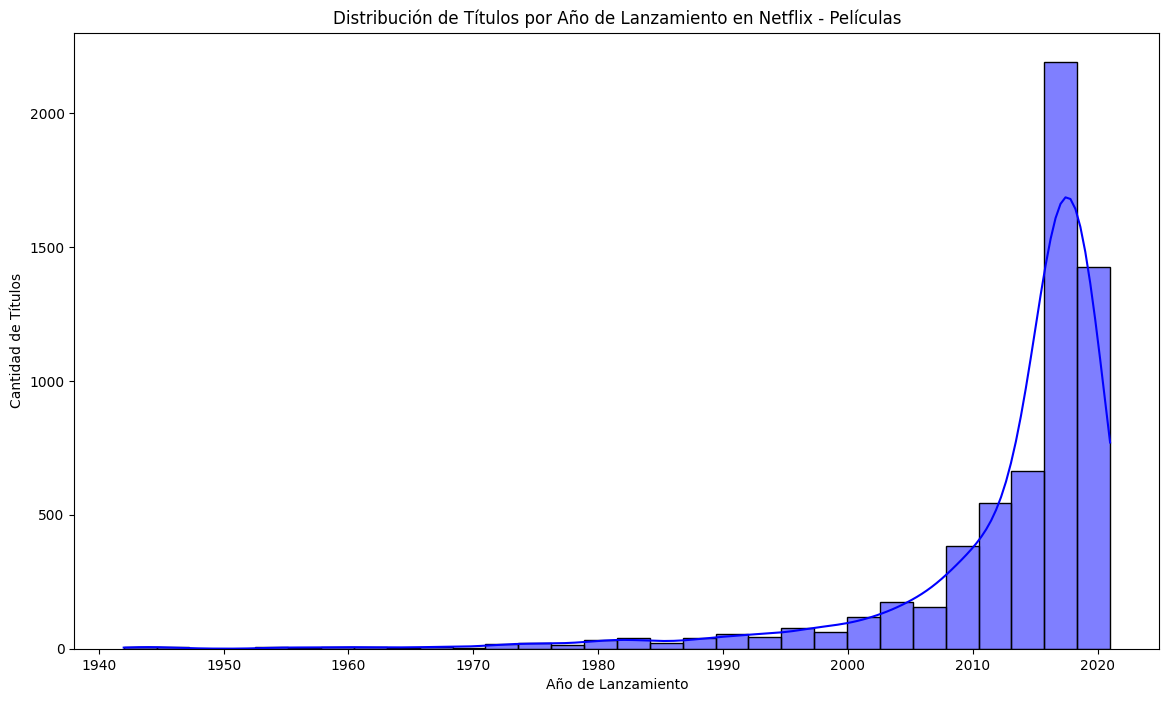

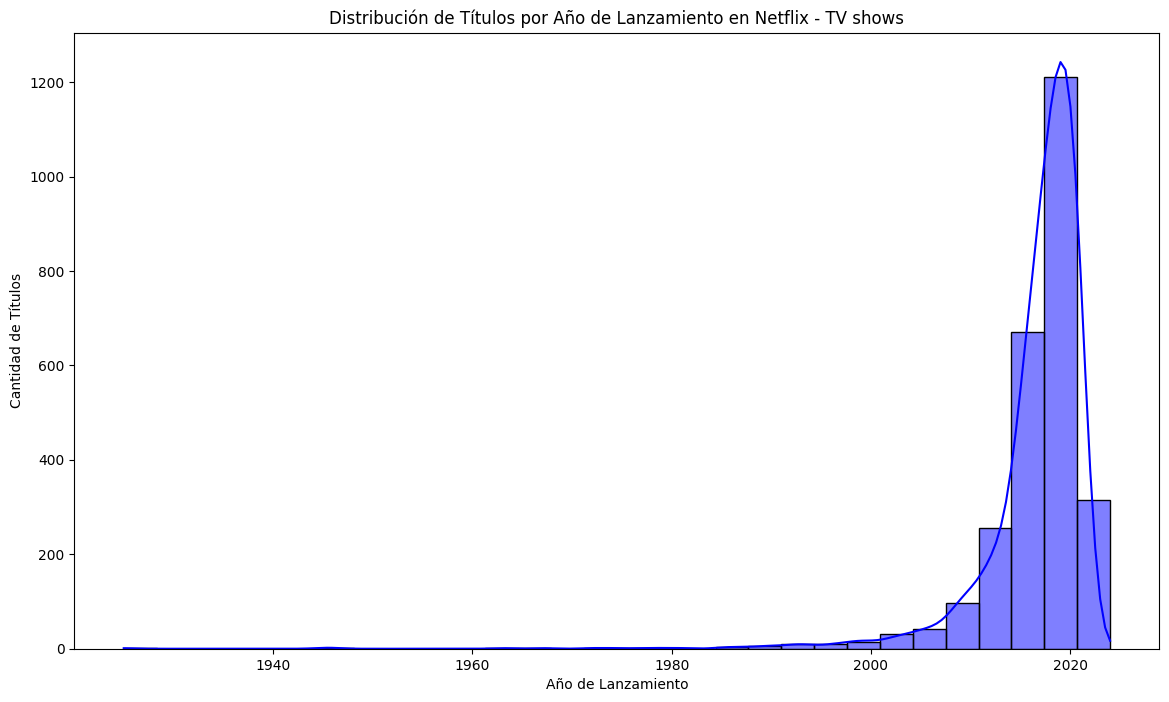

In [199]:
movies_release_year_counts = movies['release_year'].value_counts().sort_index()
tvshows_release_year_counts = tv_shows['release_year'].value_counts().sort_index()
print(movies_release_year_counts)
print(tvshows_release_year_counts)

plt.figure(figsize=(14, 8))
sns.histplot(x=movies['release_year'], kde=True, color='blue', bins=30)
plt.title('Distribución de Títulos por Año de Lanzamiento en Netflix - Películas')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Títulos')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(x=tv_shows['release_year'], kde=True, color='blue', bins=30)
plt.title('Distribución de Títulos por Año de Lanzamiento en Netflix - TV shows')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Títulos')
plt.show()

## Distribución del año y el mes en el cual las peliculas y los tv shows fueron agregados en Netflix

year_added
2008.0       1
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0       6
2014.0      19
2015.0      56
2016.0     253
2017.0     839
2018.0    1236
2019.0    1423
2020.0    1284
2021.0     993
2024.0       1
Name: count, dtype: int64
month_added
1.0     546
2.0     382
3.0     528
4.0     551
5.0     439
6.0     492
7.0     565
8.0     519
9.0     519
10.0    544
11.0    498
12.0    547
Name: count, dtype: int64


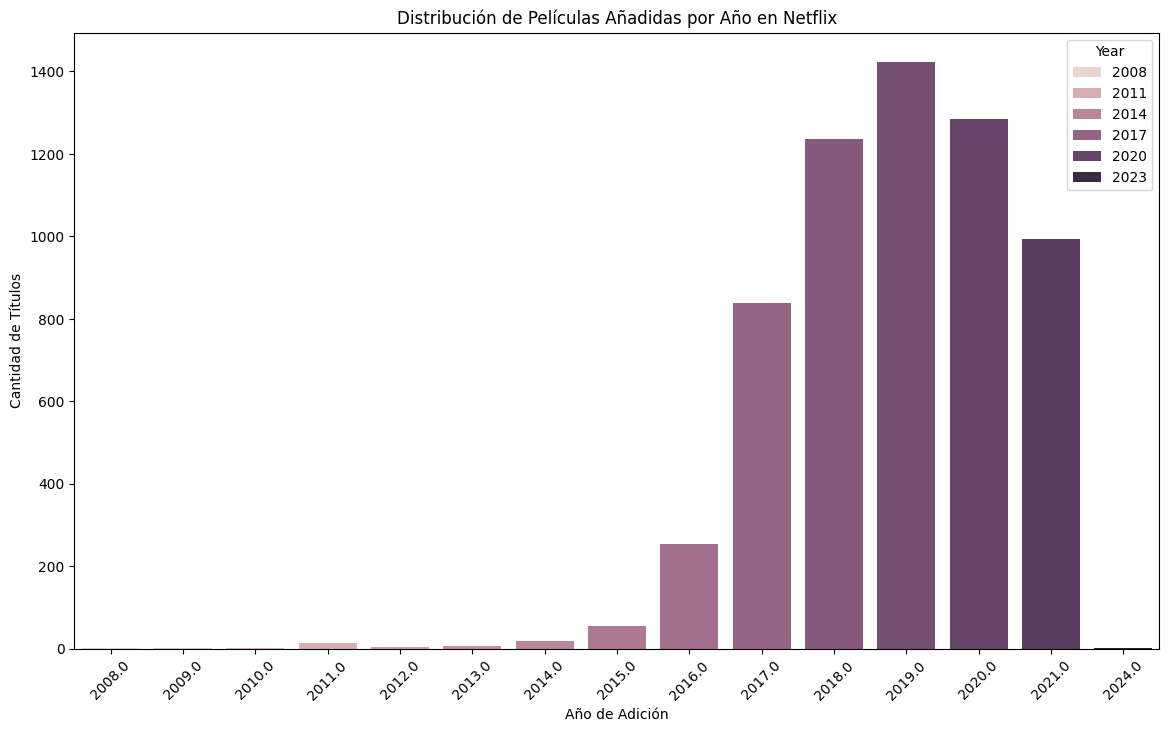

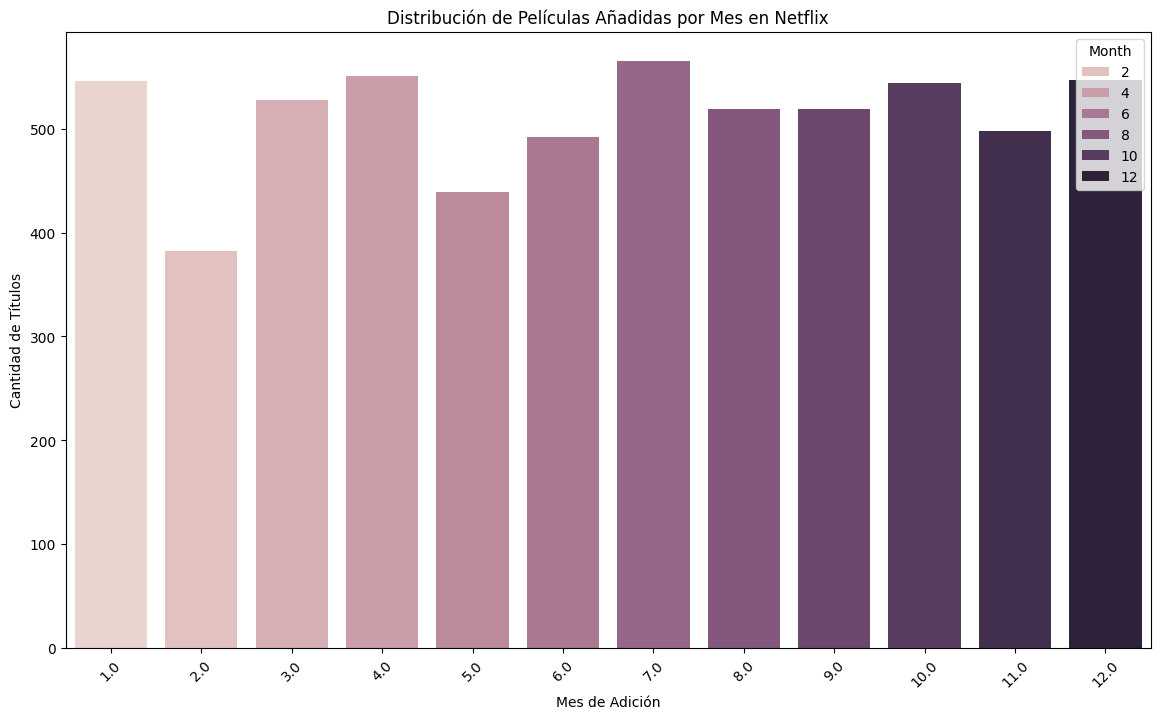

year_added
2000.0     10
2008.0      1
2013.0      5
2014.0      5
2015.0     26
2016.0    176
2017.0    349
2018.0    412
2019.0    591
2020.0    595
2021.0    505
2024.0      1
Name: count, dtype: int64
month_added
1.0     202
2.0     181
3.0     212
4.0     215
5.0     193
6.0     236
7.0     262
8.0     236
9.0     251
10.0    215
11.0    207
12.0    266
Name: count, dtype: int64


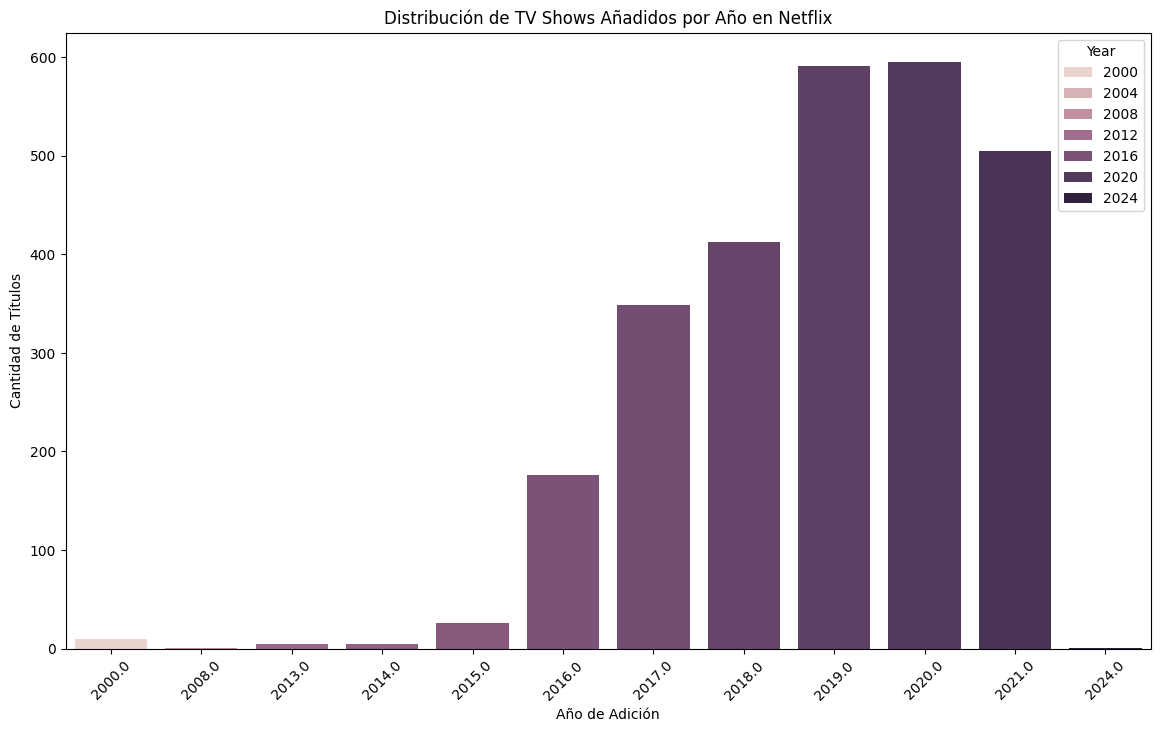

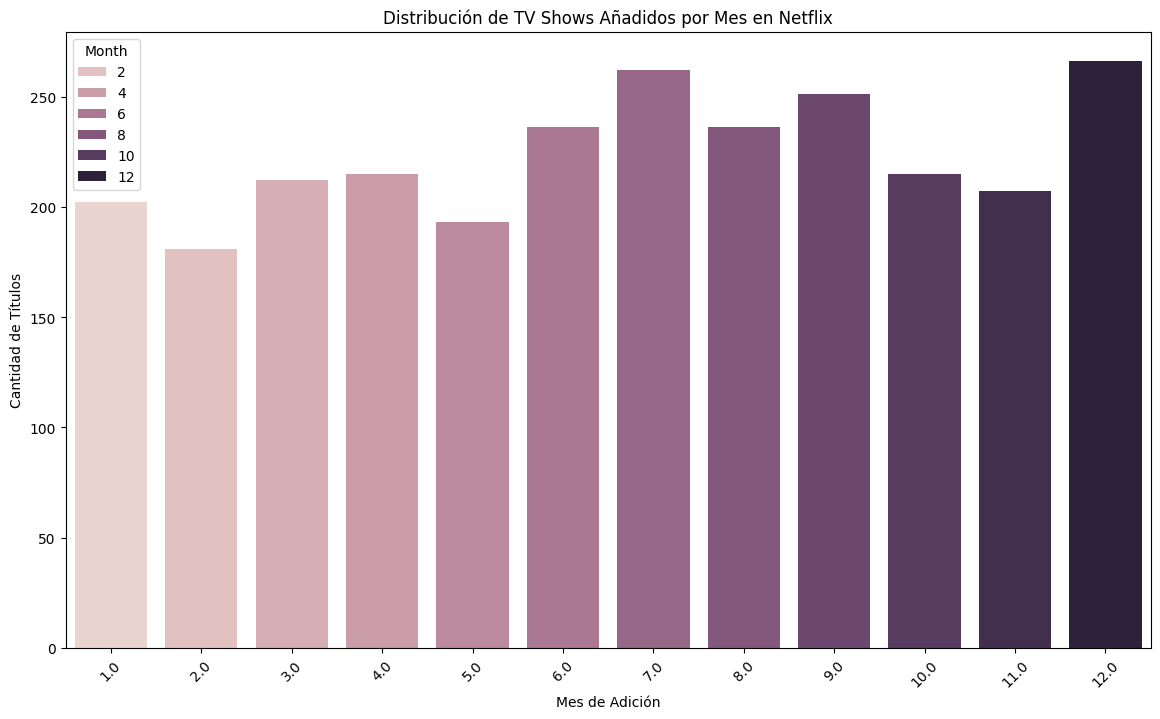

In [203]:

# Extraer el año y el mes de la fecha de adición
movies.loc[:,'year_added'] = movies['date_added'].dt.year
movies.loc[:,'month_added'] = movies['date_added'].dt.month

# Contar la cantidad de títulos añadidos por año
movies_year_added_counts = movies['year_added'].value_counts().sort_index()
print(movies_year_added_counts)

# Contar la cantidad de títulos añadidos por mes
movies_month_added_counts = movies['month_added'].value_counts().sort_index()
print(movies_month_added_counts)


plt.figure(figsize=(14, 8))
sns.barplot(x=movies_year_added_counts.index, y=movies_year_added_counts.values, hue=movies_year_added_counts.index)
plt.title('Distribución de Películas Añadidas por Año en Netflix')
plt.xlabel('Año de Adición')
plt.ylabel('Cantidad de Títulos')
plt.xticks(rotation=45)  
plt.legend(title='Year')
plt.show()


plt.figure(figsize=(14, 8))
sns.barplot(x=movies_month_added_counts.index, y=movies_month_added_counts.values, hue=movies_month_added_counts.index)
plt.title('Distribución de Películas Añadidas por Mes en Netflix')
plt.xlabel('Mes de Adición')
plt.ylabel('Cantidad de Títulos')
plt.xticks(rotation=45) 
plt.legend(title='Month')
plt.show()


# Extraer el año y el mes de la fecha de adición
tv_shows.loc[:,'year_added'] = tv_shows['date_added'].dt.year
tv_shows.loc[:,'month_added'] = tv_shows['date_added'].dt.month

# Contar la cantidad de títulos añadidos por año
tvshows_year_added_counts = tv_shows['year_added'].value_counts().sort_index()
print(tvshows_year_added_counts)

# Contar la cantidad de títulos añadidos por mes
tvshows_month_added_counts = tv_shows['month_added'].value_counts().sort_index()
print(tvshows_month_added_counts)


plt.figure(figsize=(14, 8))
sns.barplot(x=tvshows_year_added_counts.index, y=tvshows_year_added_counts.values, hue=tvshows_year_added_counts.index)
plt.title('Distribución de TV Shows Añadidos por Año en Netflix')
plt.xlabel('Año de Adición')
plt.ylabel('Cantidad de Títulos')
plt.xticks(rotation=45)  
plt.legend(title='Year')
plt.show()


plt.figure(figsize=(14, 8))
sns.barplot(x=tvshows_month_added_counts.index, y=tvshows_month_added_counts.values, hue=tvshows_month_added_counts.index)
plt.title('Distribución de TV Shows Añadidos por Mes en Netflix')
plt.xlabel('Mes de Adición')
plt.ylabel('Cantidad de Títulos')
plt.xticks(rotation=45) 
plt.legend(title='Month')
plt.show()

## Distribución de las categorías para películas y TV shows en Netflix

listed_in
International Movies        2752
Dramas                      2425
Comedies                    1673
Documentaries                869
Action & Adventure           859
Independent Movies           755
Children & Family Movies     641
Romantic Movies              616
Thrillers                    576
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
Drama                          1
Romance                        1
Thriller                       1
Name: count, dtype: int64
listed_in
International TV Shows          1350
TV Dramas                        762
TV Comedies                      581
Crime TV Shows                   470
Kids' TV                         451
Docuseries

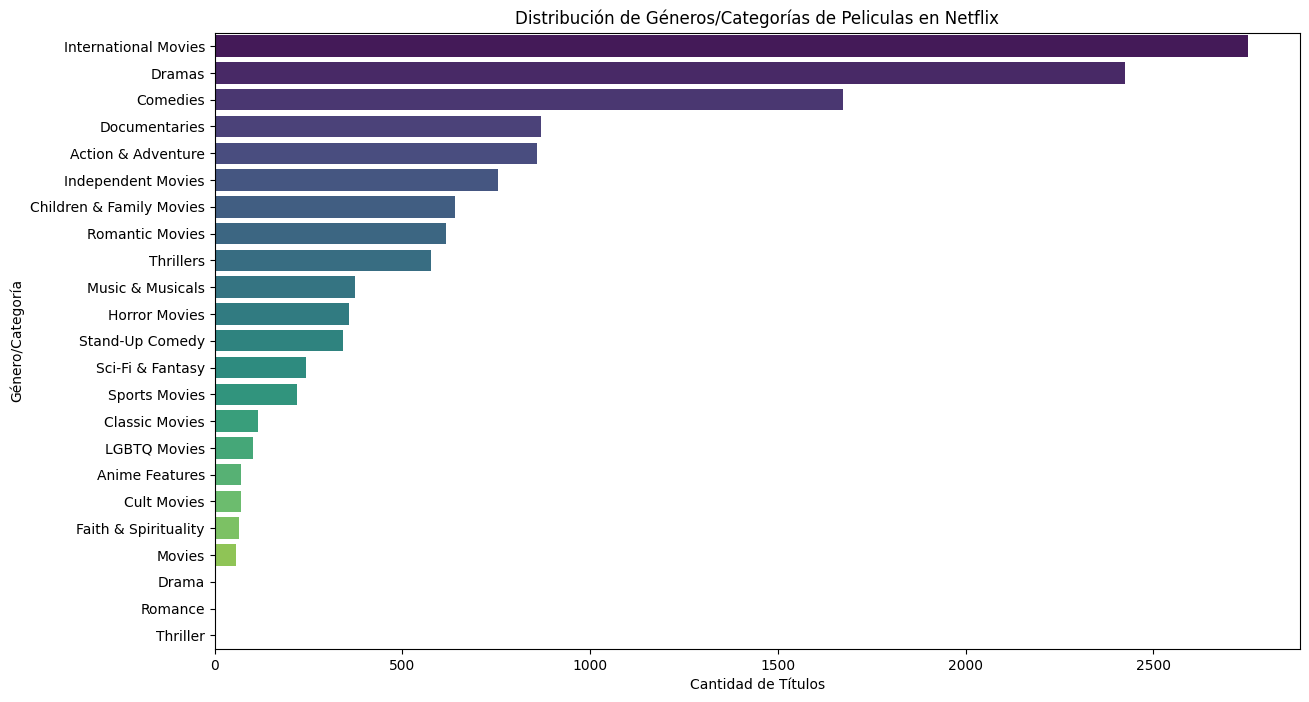

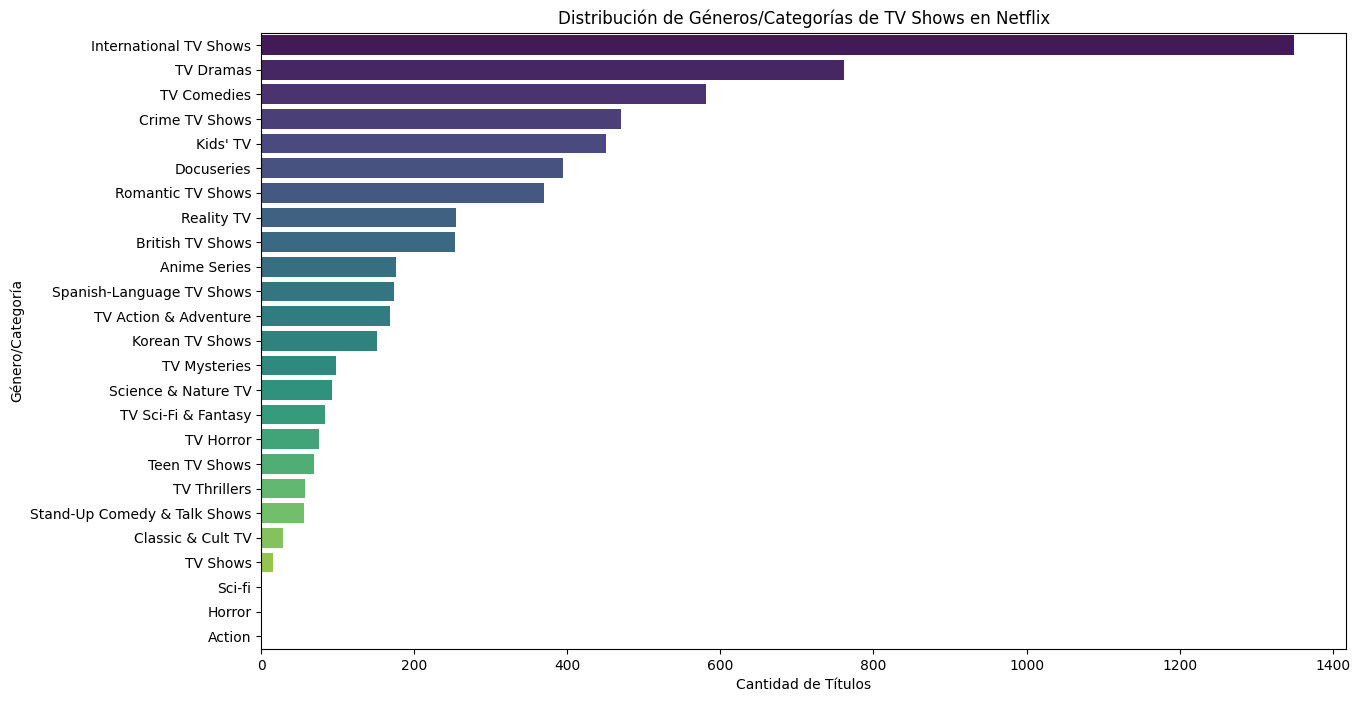

In [ ]:
movies_categories = movies['listed_in'].str.split(', ').explode()
tvshows_categories = tv_shows['listed_in'].str.split(', ').explode()

# Contar la ocurrencia de cada género/categoría
movies_category_counts = movies_categories.value_counts()
tvshows_category_counts = tvshows_categories.value_counts()
print(movies_category_counts)
print(tvshows_category_counts)


plt.figure(figsize=(14, 8))
sns.barplot(y=movies_category_counts.index[:25], x=movies_category_counts.values[:25], palette='viridis', hue=movies_category_counts.index[:25])
plt.title('Distribución de Géneros/Categorías de Peliculas en Netflix')
plt.xlabel('Cantidad de Títulos')
plt.ylabel('Género/Categoría')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(y=tvshows_category_counts.index[:25], x=tvshows_category_counts.values[:25], palette='viridis', hue=tvshows_category_counts.index[:25])
plt.title('Distribución de Géneros/Categorías de TV Shows en Netflix')
plt.xlabel('Cantidad de Títulos')
plt.ylabel('Género/Categoría')
plt.show()



## Directores más comunes en las peliculas y TV shows de Netflix

director
Rajiv Chilaka          22
Jan Suter              21
RaÃºl Campos           19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Steven Spielberg       11
Don Michael Paul       10
YÄ±lmaz ErdoÄŸan        9
Shannon Hartman         9
Anurag Kashyap          9
David Dhawan            9
Fernando AyllÃ³n        8
Ryan Polito             8
Quentin Tarantino       8
Hakan AlgÃ¼l            8
Name: count, dtype: int64


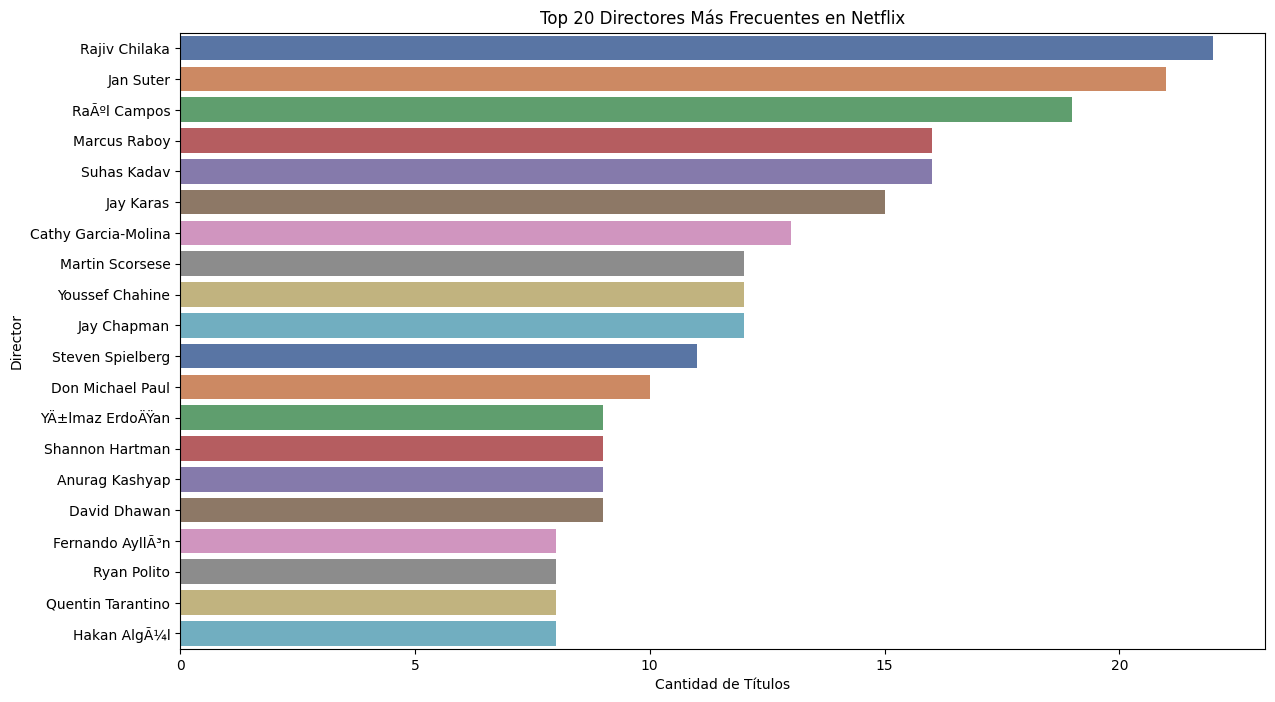

In [ ]:
df_directors = df['director'].str.split(', ').explode()
df_directors = df_directors[df_directors != 'Unknown']

director_counts = df_directors.value_counts().head(20)  
print(director_counts)


plt.figure(figsize=(14, 8))
sns.barplot(y=director_counts.index, x=director_counts.values, palette='deep', hue=director_counts.index)
plt.title('Top 20 Directores Más Frecuentes en Netflix')
plt.xlabel('Cantidad de Títulos')
plt.ylabel('Director')
plt.show()

## Actores más frecuentes en las películas y TV shows de Netflix

cast
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Takahiro Sakurai     32
Naseeruddin Shah     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Paresh Rawal         28
Amitabh Bachchan     28
Boman Irani          27
Rajesh Kava          26
Vincent Tong         26
Kareena Kapoor       25
Andrea Libman        25
John Cleese          24
Samuel L. Jackson    24
Tara Strong          23
Jigna Bhardwaj       23
Name: count, dtype: int64


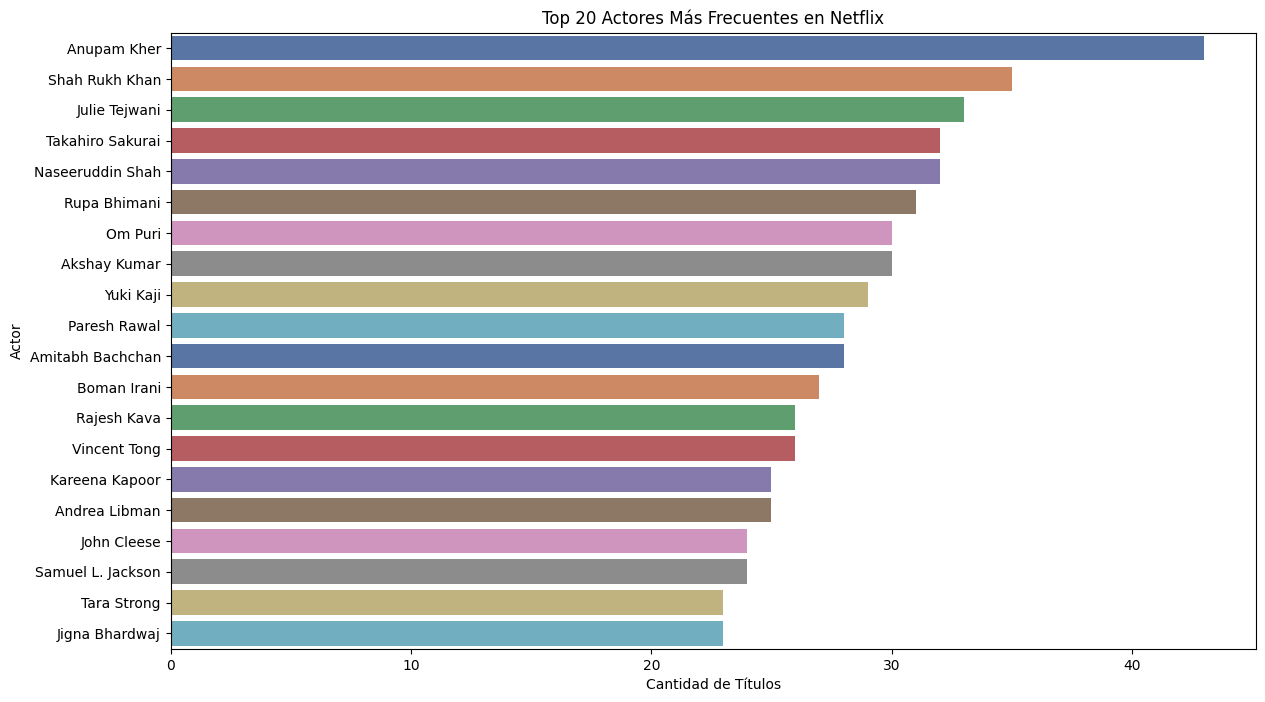

In [ ]:
df_actors = df['cast'].str.split(', ').explode()
df_actors = df_actors[df_actors != 'Unknown']

# Contar la ocurrencia de cada actor
actor_counts = df_actors.value_counts().head(20)  
print(actor_counts)

plt.figure(figsize=(14, 8))
sns.barplot(y=actor_counts.index, x=actor_counts.values, palette='deep', hue=actor_counts.index)
plt.title('Top 20 Actores Más Frecuentes en Netflix')
plt.xlabel('Cantidad de Títulos')
plt.ylabel('Actor')
plt.show()

## Duración vs Año de lanzamiento

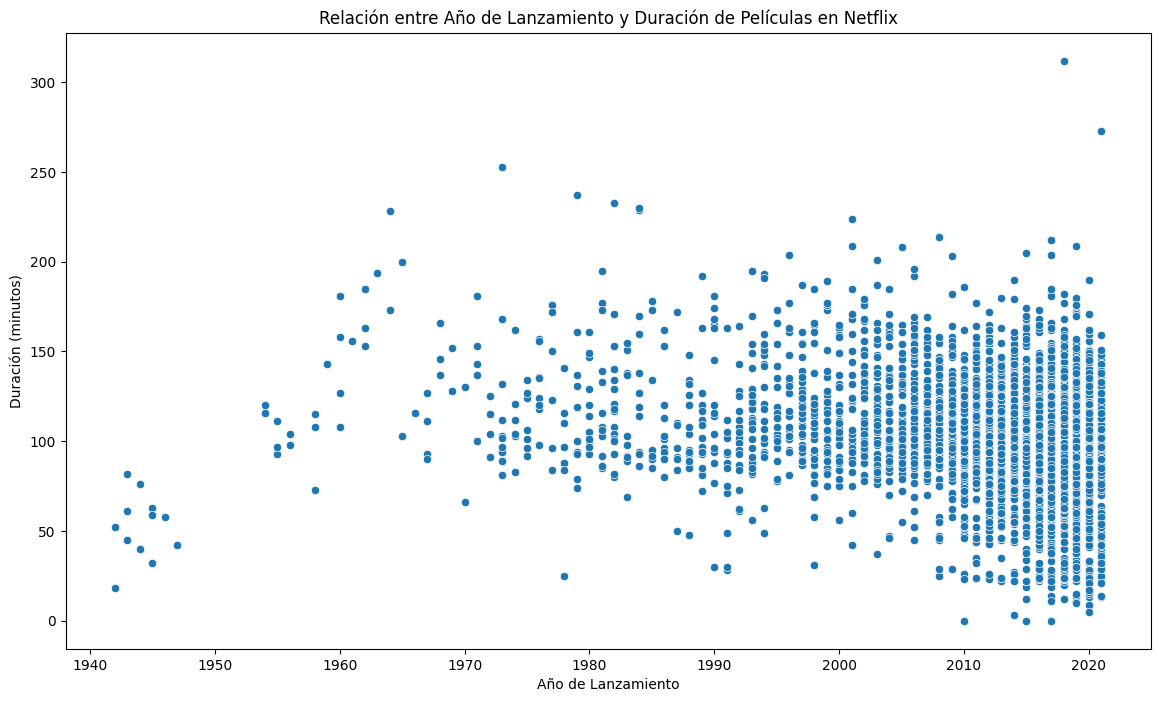

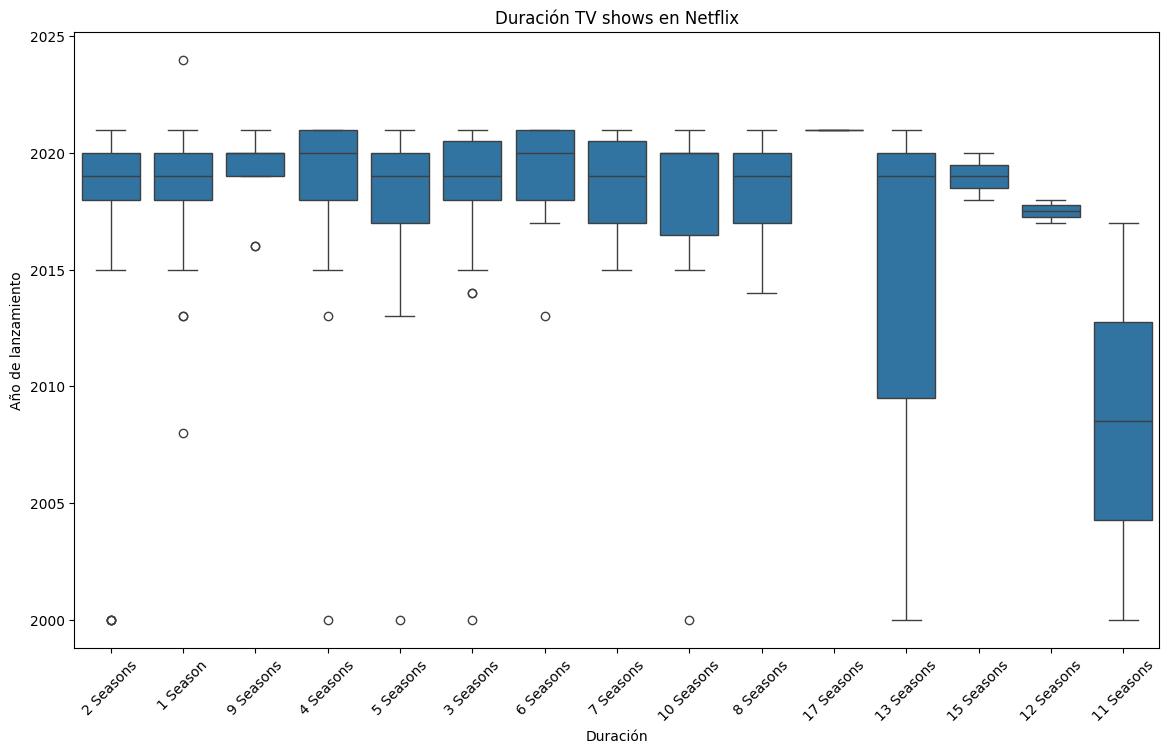

In [221]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=movies, x='release_year', y='duration_num', legend=False)
plt.title('Relación entre Año de Lanzamiento y Duración de Películas en Netflix')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Duración (minutos)')
plt.show()

# Gráfico de dispersión para series
plt.figure(figsize=(14, 8))
sns.boxplot(x='duration', y='year_added', data=tv_shows)
plt.title('Duración TV shows en Netflix')
plt.xlabel('Duración')
plt.xticks(rotation=45)
plt.ylabel('Año de lanzamiento')
plt.show()


## Año y mes de lanzamiento de películas y TV shows en Netflix

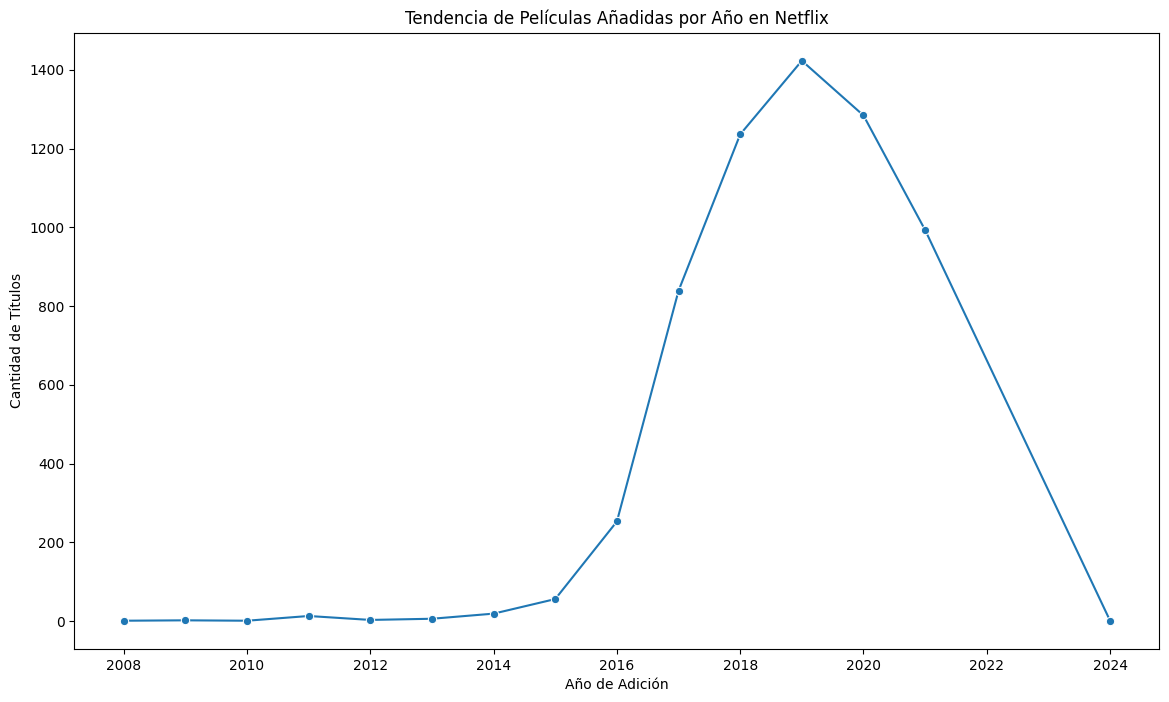

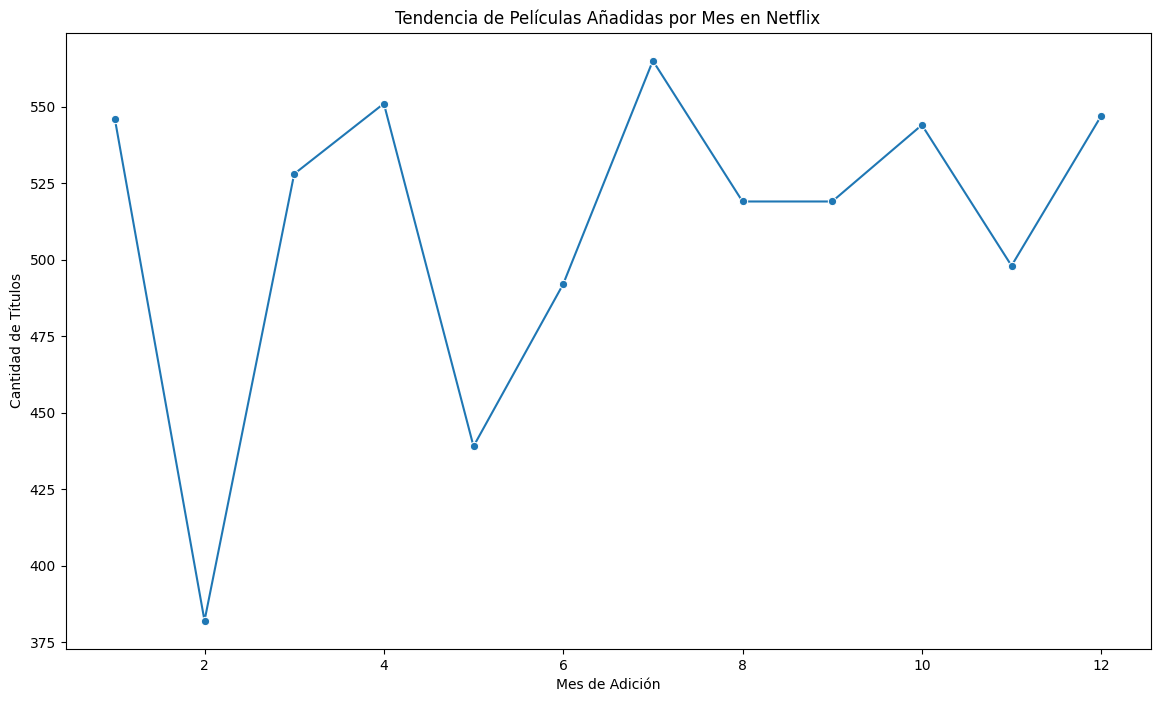

In [220]:
year_added_counts = movies['year_added'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x=year_added_counts.index, y=year_added_counts.values, marker='o')
plt.title('Tendencia de Películas Añadidas por Año en Netflix')
plt.xlabel('Año de Adición')
plt.ylabel('Cantidad de Títulos')
plt.show()

month_added_counts = movies['month_added'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x=month_added_counts.index, y=month_added_counts.values, marker='o')
plt.title('Tendencia de Películas Añadidas por Mes en Netflix')
plt.xlabel('Mes de Adición')
plt.ylabel('Cantidad de Títulos')
plt.show()

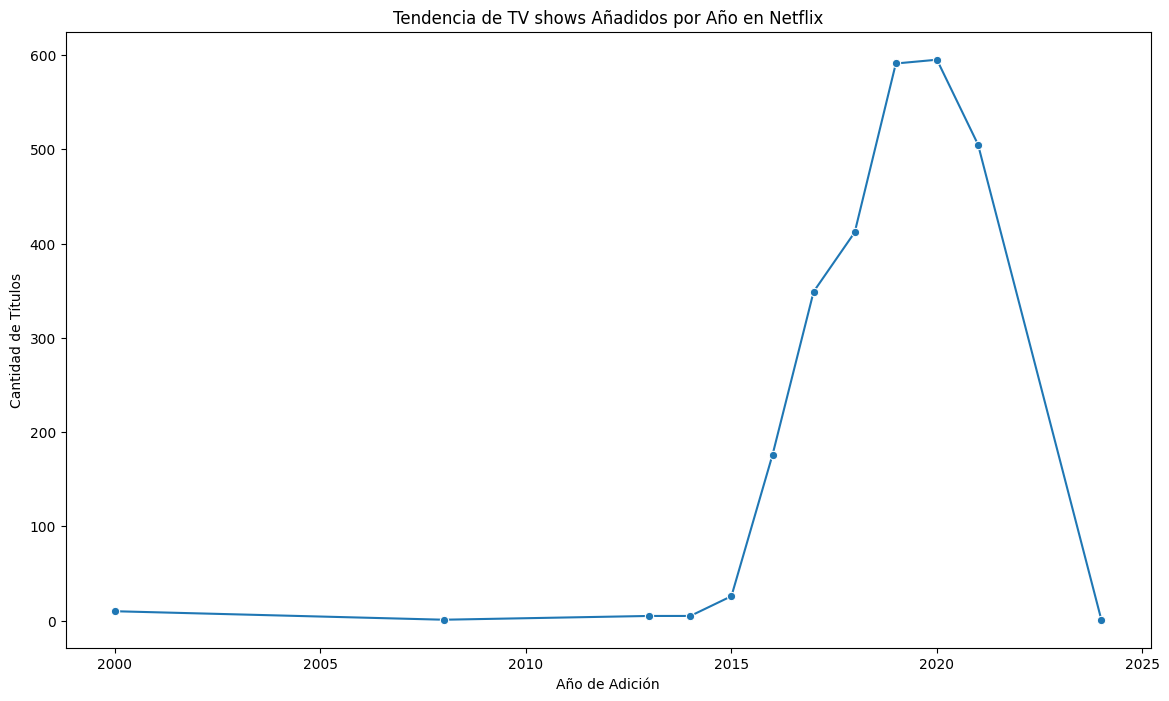

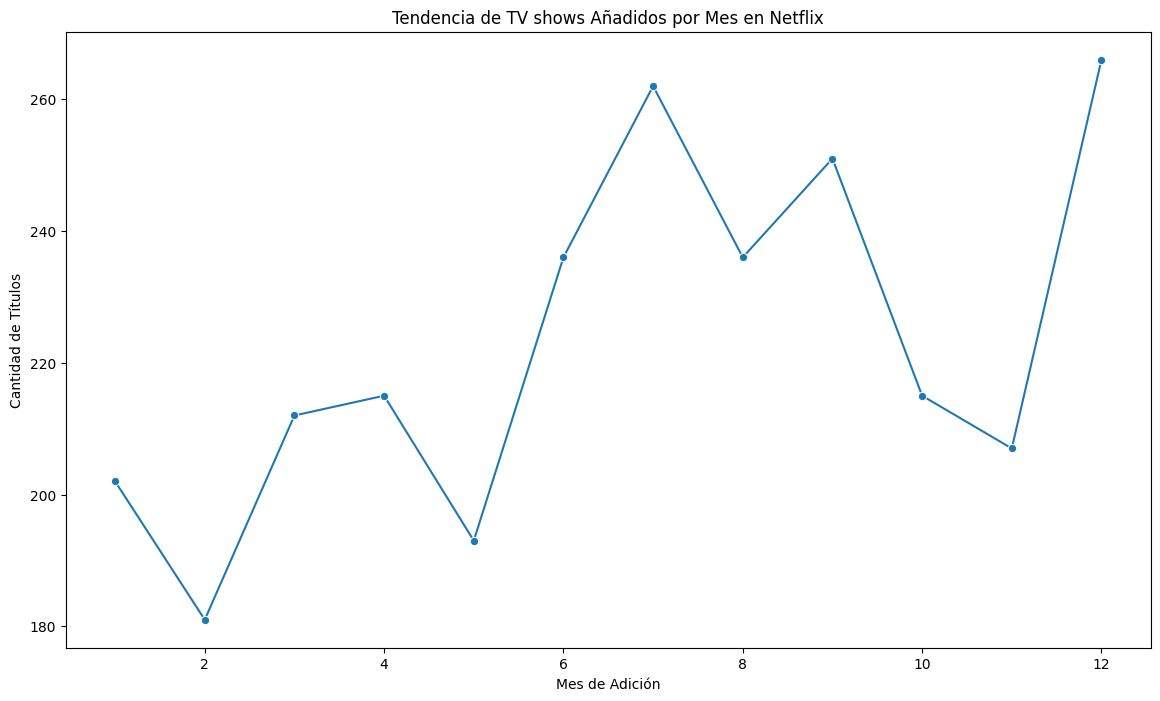

In [219]:
year_added_counts = tv_shows['year_added'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x=year_added_counts.index, y=year_added_counts.values, marker='o')
plt.title('Tendencia de TV shows Añadidos por Año en Netflix')
plt.xlabel('Año de Adición')
plt.ylabel('Cantidad de Títulos')
plt.show()

month_added_counts = tv_shows['month_added'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x=month_added_counts.index, y=month_added_counts.values, marker='o')
plt.title('Tendencia de TV shows Añadidos por Mes en Netflix')
plt.xlabel('Mes de Adición')
plt.ylabel('Cantidad de Títulos')
plt.show()